In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In this notebook we find numerical solutions to the differential equation $\frac{dx}{dt}=x(1-x)$, using the function `solve_ivp()` from the package `scipy.integrate`.

It is not actually necessary to use numerical methods here.  The equation can be rewritten as $\frac{dt}{dx}=\frac{1}{x(1-x)}=\frac{1}{x}-\frac{1}{x-1}$, giving $t=C+\ln(x)-\ln(x-1)$ for some constant $C$.  This gives $C-t=\ln(x-1)-\ln(x)=\ln(1-1/x)$ so $e^C e^{-t}=1-1/x$, which can be rearranged as $x=1/(1+Ae^{-t})$ with $A=-e^C$.  If we want $x=x_0$ at $t=0$ we must take $A=1/x_0-1$.  However, this is not a very common situation.  In many applications, most differential equations cannot be solved exactly, and we need to use numerical methods.

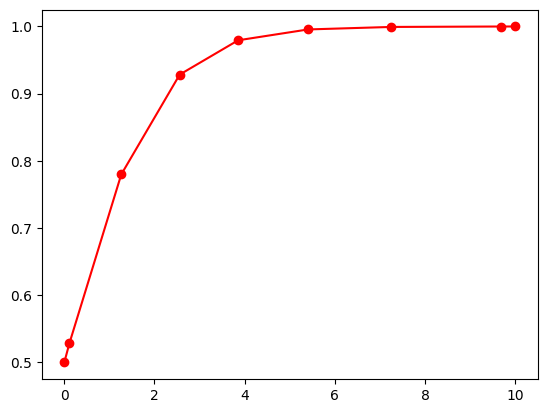

In [2]:
def dx_dt(t, x):
    return x*(1-x)

x0 = 0.5

sol = solve_ivp(dx_dt, [0, 10], [x0])
plt.plot(sol.t, sol.y[0], 'r-o')

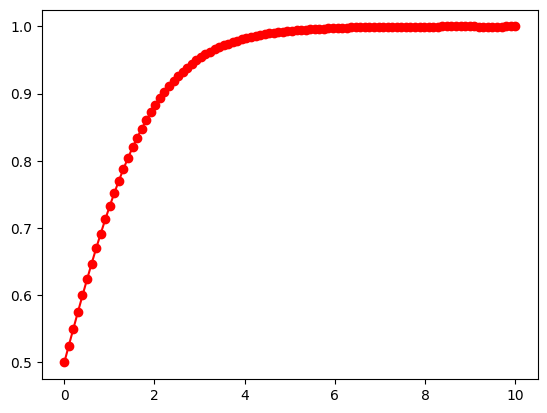

In [3]:
ts = np.linspace(0, 10, 100)
sol = solve_ivp(dx_dt, [ts[0], ts[-1]], [x0], t_eval=ts)
plt.plot(sol.t, sol.y[0], 'r-o')

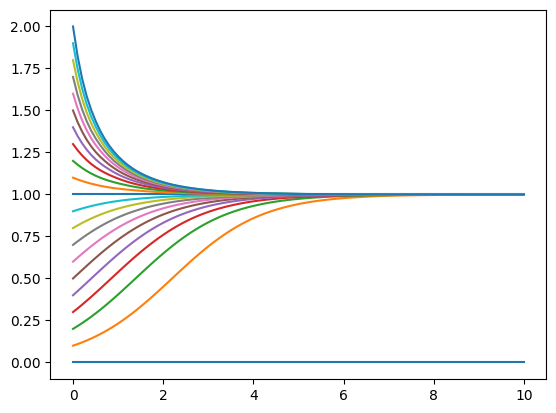

In [4]:
ics = np.linspace(0.0, 2.0, 21)
for x0 in ics:
    sol = solve_ivp(dx_dt, [ts[0], ts[-1]], [x0], t_eval=ts)
    plt.plot(sol.t, sol.y[0])